In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
from skimage.external.tifffile import imread
from skimage import io
import os
from os.path import join as oj
import data
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate, train_test_split

X, Y = data.get_data()

/system/linux/anaconda3.7/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


# predict reg

In [3]:
X_max_log, Y_max = data.extract_single_pixel_max_features(X, Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_feat, Y_max, test_size=0.33, random_state=42)

In [212]:
thresh = np.percentile(Y_max, 70)
Y_thresh_train = 1 * (Y_train > thresh)
Y_thresh_test = 1 * (Y_test > thresh)

In [213]:
np.corrcoef(np.transpose(X_feat), np.transpose(Y_max))

array([[1.        , 0.75864831],
       [0.75864831, 1.        ]])

In [214]:
m = LinearRegression()
m.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [215]:
# R^2
m.score(X_test, Y_test)

0.5766020570561812

In [216]:
m = LogisticRegression()
m.fit(X_train, Y_thresh_train)

/usr/local/linux/anaconda3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/linux/anaconda3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [217]:
m.score(X_test, Y_thresh_test)

0.783379106369494

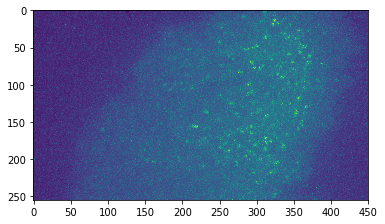

In [82]:
plt.imshow(Y.max(axis=0))

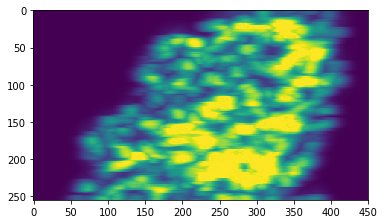

In [198]:
plt.imshow(X_max_log)